In [1]:
## Start of case study

# Bike Sharing - BoomBikes

Understanding the demand of shared bikes post corona pandemic

The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Steps to be performed
1. Reading and Understanding the data
2. Visualizing the data
3. Prepare the data for modeling (Train-Test split, Dealing with categorical variables, Adding dummy variables, Scaling etc.)
4. Building of the model (Top-down/bottom-up or a combination etc.)
5. Residual Analysis
6. Prediction and evaluation on the test set

## Step 1: Reading and Understanding the Data

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### a. Read the data

In [3]:
# Reading data from csv
bikeSharingDF = pd.read_csv("day.csv")

### b. Understand the data

In [4]:
bikeSharingDF.shape

(730, 16)

In [5]:
bikeSharingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


As we can see here, there are no missing values.

In [6]:
bikeSharingDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bikeSharingDF.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### c. Dropping irrelevant columns

In [8]:
# Can drop instant as it is index, Can drop casual and registered, as together, they are cnt
# Drop dteday, as it is redundant - month, year are captured in other columns
bikeSharingDF.drop(['dteday','instant','casual','registered'], axis = 1, inplace = True)

bikeSharingDF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Encoding and Visualising the Data

#### a. Encoding variables to categorical variables

Variables like season, weekday, month and weather have numbers instead of the actual values. Converting the numbers to actual values so as to interpret them better

In [9]:
## Encoding season, month, weekday and weathersit columns so that they become categorical variables
bikeSharingDF.season.replace((1,2,3,4), ('spring','summer','fall','winter'), inplace=True)
bikeSharingDF.season.value_counts(normalize=True)

fall      0.257534
summer    0.252055
spring    0.246575
winter    0.243836
Name: season, dtype: float64

In [10]:
bikeSharingDF.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bikeSharingDF.mnth.value_counts(normalize=True)

Oct    0.084932
Aug    0.084932
Mar    0.084932
Jan    0.084932
Dec    0.084932
May    0.084932
Jul    0.084932
Sep    0.082192
Nov    0.082192
Jun    0.082192
Apr    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [11]:
bikeSharingDF.weekday.replace((0,1,2,3,4,5,6), ('sunday','monday','tuesday','wednesday','thursday','friday','saturday'), inplace=True)
bikeSharingDF.weekday.value_counts(normalize=True)

monday       0.143836
saturday     0.143836
sunday       0.143836
friday       0.142466
tuesday      0.142466
thursday     0.142466
wednesday    0.141096
Name: weekday, dtype: float64

In [12]:
bikeSharingDF.weathersit.replace((1,2,3,4), ('clear','cloudy_misty','Light_rain_snow','heavy_rain_fog'), inplace=True)
bikeSharingDF.weathersit.value_counts(normalize=True)

clear              0.634247
cloudy_misty       0.336986
Light_rain_snow    0.028767
Name: weathersit, dtype: float64

In [13]:
bikeSharingDF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,saturday,0,cloudy_misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sunday,0,cloudy_misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### b. Visualising Variables

Boxplot for categorical variables and Pairplot of all the numeric variables

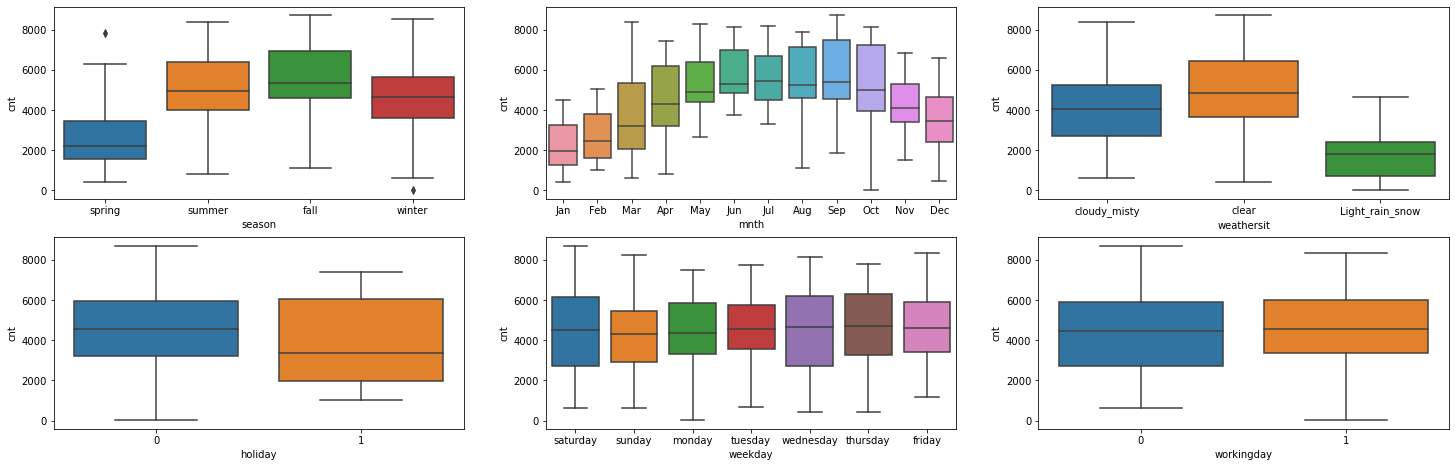

In [14]:
plt.figure(figsize=(25, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharingDF)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharingDF)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharingDF)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharingDF)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharingDF)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharingDF)
plt.show()

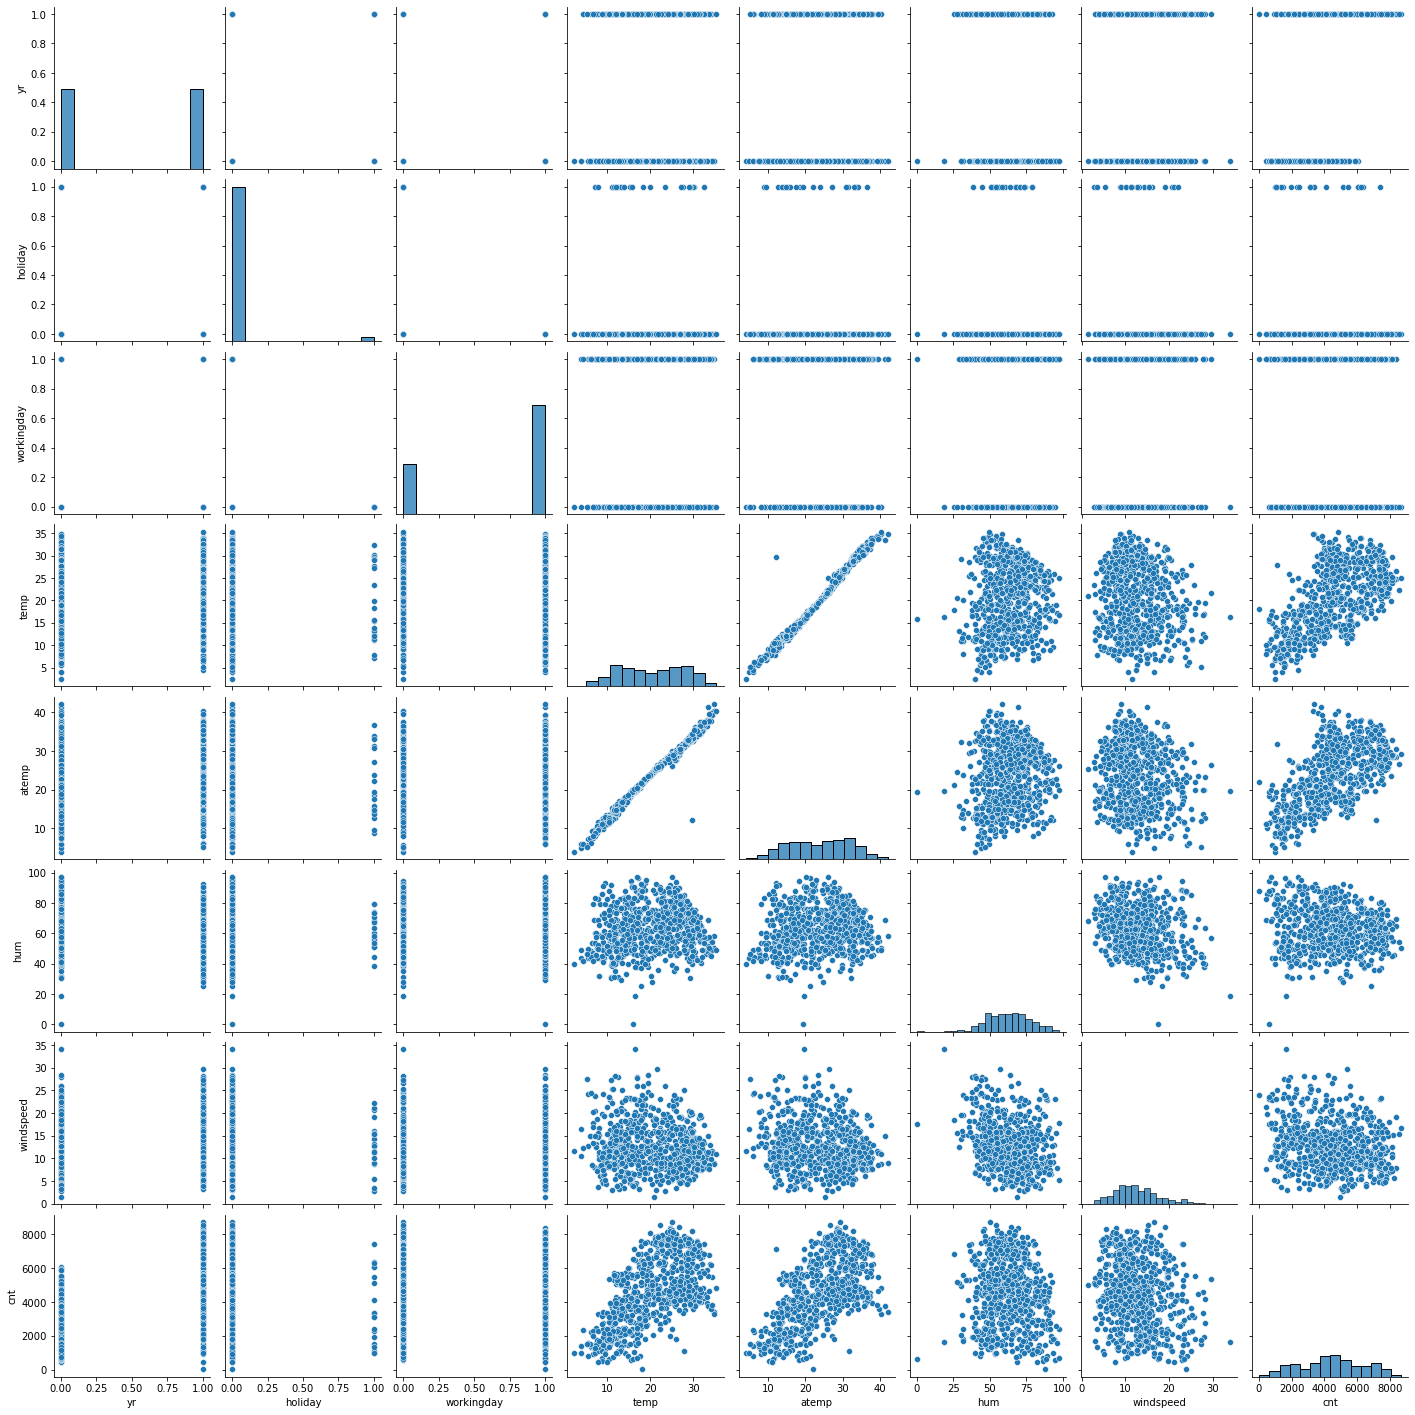

In [15]:
sns.pairplot(bikeSharingDF)
plt.show()

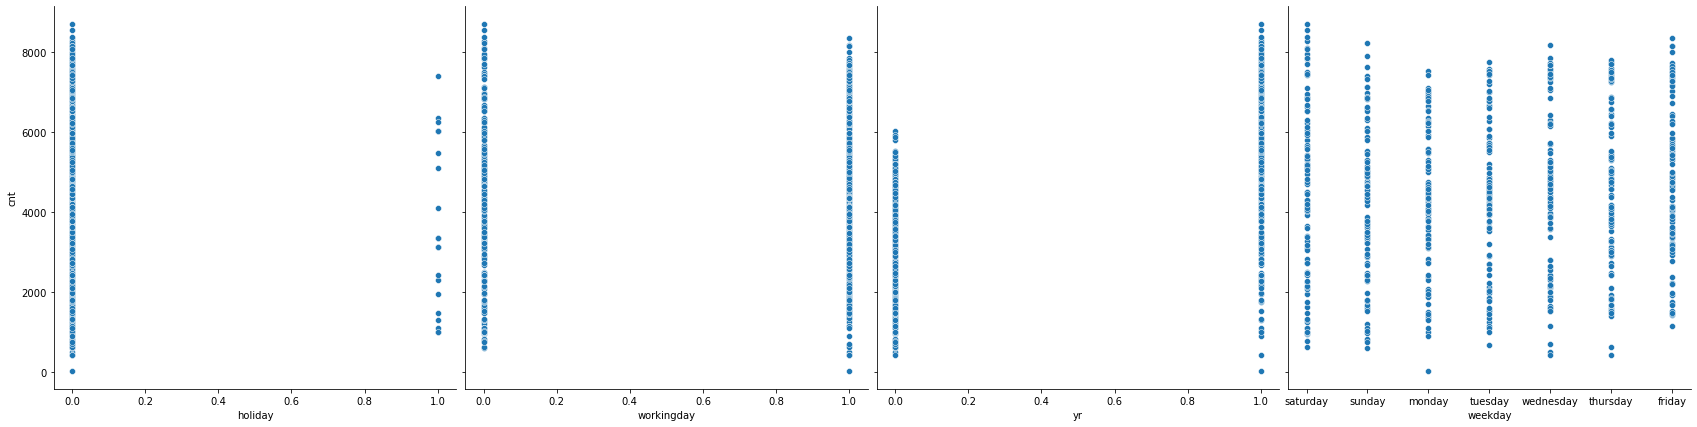

In [16]:
sns.pairplot(bikeSharingDF, x_vars=['holiday', 'workingday','yr','weekday'], y_vars='cnt',size=6, aspect=1, kind='scatter')
plt.show()

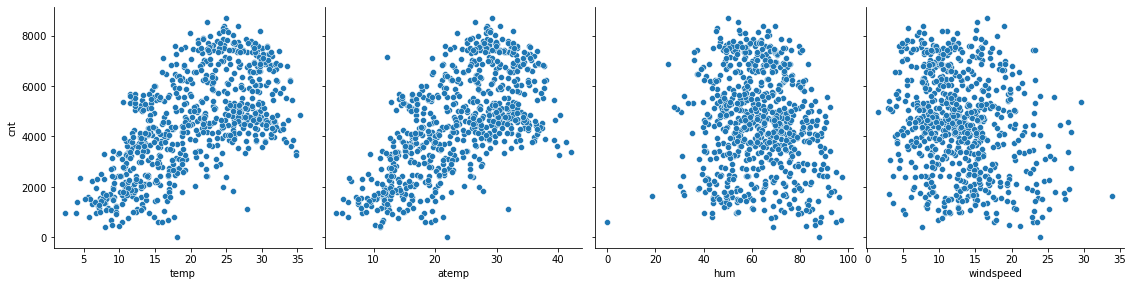

In [17]:
sns.pairplot(bikeSharingDF, x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

## Step 3: Preparing the data for the model

### a. Creating dummy variables

Creating dummy variables for the categorical variables - weekday, season, month and weathersit

Example for weathersit column:
We don't need three columns, as the type of weather can be identified with just the  two columns where — 
- `00` will correspond to `Light_rain_snow` weather
- `01` will correspond to `Cloudy_Misty` weather
- `10` will correspond to `Clear` weather

Similarly, for all dummy variables, the number of columns is n-1 for n category levels

In [18]:
category_columns=['season','mnth','weathersit','weekday']
# Dropping the first column. if category levels are n, then dummy variable columns are n-1
dummyVariablesDF = pd.get_dummies(bikeSharingDF[category_columns], drop_first = True)

#Concat the new columns with the original dataframe
bikeSharingDF = pd.concat([bikeSharingDF, dummyVariablesDF], axis = 1)

In [19]:
# Drop the categorical variables, now that the dummy variables are created
bikeSharingDF.drop(category_columns, axis = 1, inplace = True)

In [20]:
bikeSharingDF.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weathersit_clear,weathersit_cloudy_misty,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,1


In [21]:
bikeSharingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       730 non-null    int64  
 1   holiday                  730 non-null    int64  
 2   workingday               730 non-null    int64  
 3   temp                     730 non-null    float64
 4   atemp                    730 non-null    float64
 5   hum                      730 non-null    float64
 6   windspeed                730 non-null    float64
 7   cnt                      730 non-null    int64  
 8   season_spring            730 non-null    uint8  
 9   season_summer            730 non-null    uint8  
 10  season_winter            730 non-null    uint8  
 11  mnth_Aug                 730 non-null    uint8  
 12  mnth_Dec                 730 non-null    uint8  
 13  mnth_Feb                 730 non-null    uint8  
 14  mnth_Jan                 7

### b. Train-Test Split

In [22]:
# Split the dataframe to train and test data (typically 70-30 split)
df_train, df_test = train_test_split(bikeSharingDF, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
df_train.shape

(510, 30)

In [24]:
df_test.shape

(219, 30)

### c. Rescaling the Features 

In [25]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
variables_to_scale = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[variables_to_scale] = scaler.fit_transform(df_train[variables_to_scale])

In [26]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weathersit_clear,weathersit_cloudy_misty,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,1,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,1,0,0,0,0


In [27]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weathersit_clear,weathersit_cloudy_misty,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.627451,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.483958,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


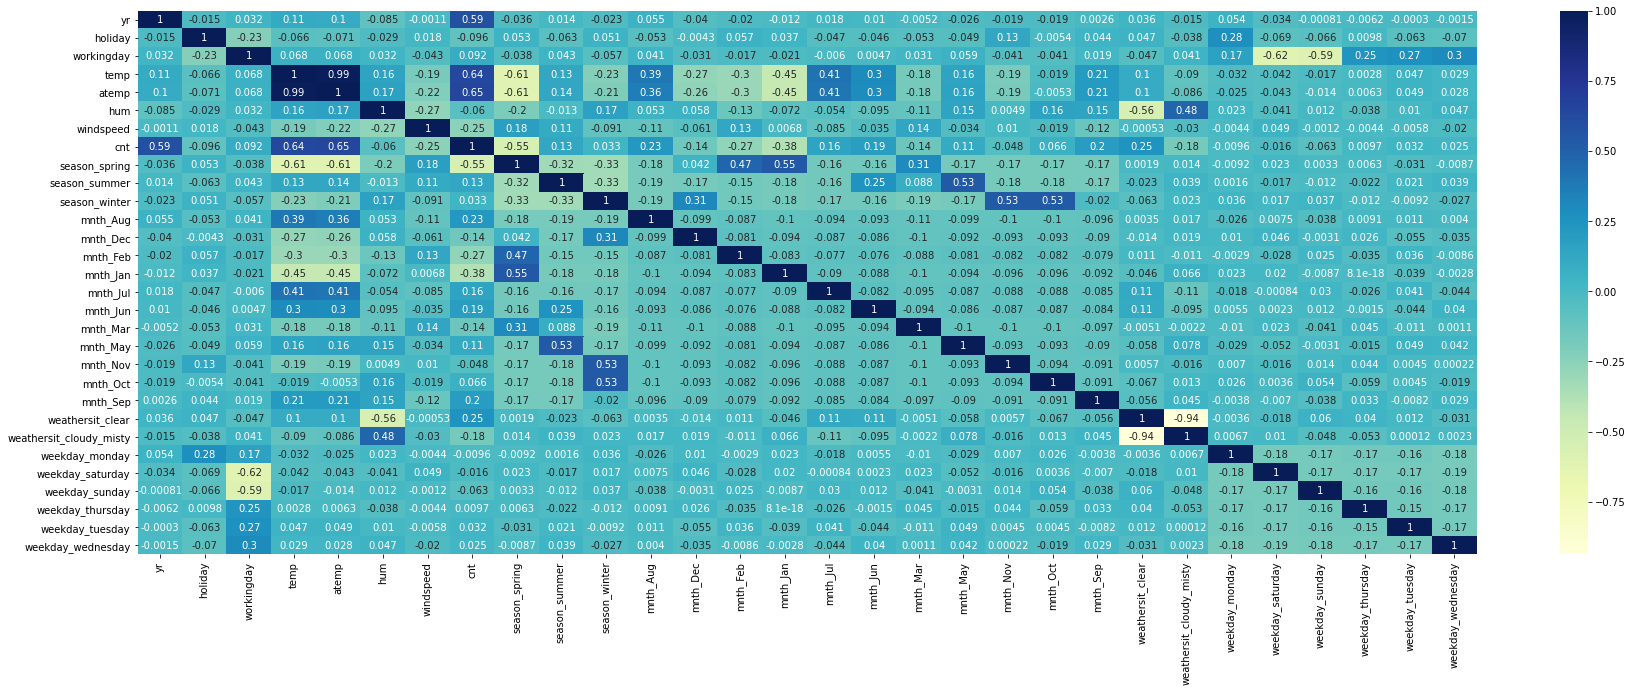

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We see that year, temp, atemp are most correlated with cnt variable

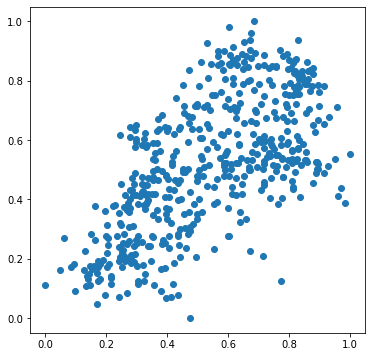

In [29]:
#Pairplot of temp and cnt
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

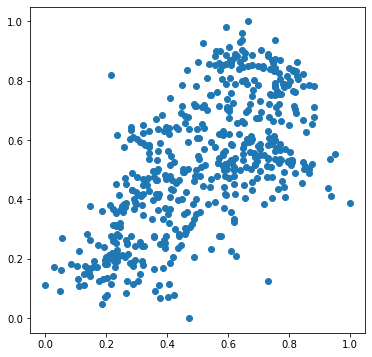

In [30]:
#Pairplot of atemp and cnt
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

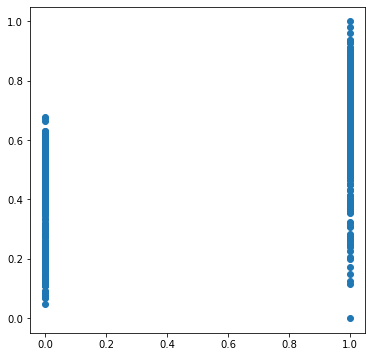

In [31]:
#Pairplot of yr and cnt
plt.figure(figsize=[6,6])
plt.scatter(df_train.yr, df_train.cnt)
plt.show()

### d. Dividing into X and Y sets for the model building

In [32]:
# Creating the X and y trainng sets
y_train = df_train.pop('cnt')
X_train = df_train

## Step 3: Building the model

There are 2 approaches that we will see below:
1. <span style="text-decoration: underline">Manual Feature Elimination</span>

    
    1. Using a top-down approach and adding all the variables to predict the model
    2. Removing features based on insignificance (high p-value) or redundant values (high VIF)
        Used the below approach:
            1. High p-value, High VIF --- Remove these
            2. Low p-value, low VIF   ---- Keep these
            3. High-Low
                a. High p-value,Low VIF - Remove these first
                b. Low p-value,High VIF - Remove these next (possible that after removing the above, VIF can change)
           
           
2. <span style="text-decoration: underline">Automated Approach</span>
       Using RFE and selected top '10' features

### a. Manual Feature Elimination

In [33]:
## Create the training set which contains all the features
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
linearRegression_1 = sm.OLS(y_train, X_train_lm).fit()

In [34]:
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.42e-181
Time:                        21:46:06   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0399      0.043      0.923      0.356      -0.045       0.125
yr                          0.2322      0.008     28.792      0.000       0.216       0.248
holiday                    -0.0407      0.025     -1.622      0.106      -0.090       0.009
workingday                  0.0456      0.014      3.334      0.001       0.019       0.073
temp                        0.4013      0.142      2.821      0.005       0.122       0.681
atemp                       0.0506      0.138      0.366      0.714      -0.221       0.322
hum                        -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed                  -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_spring              -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_summer               0.0382      0.026      1.455      0.146      -0.013       0.090
season_winter               0.1054      0.028      3.770      0.000       0.050       0.160
mnth_Aug                    0.0161      0.034      0.473      0.637      -0.051       0.083
mnth_Dec                   -0.0456      0.034     -1.356      0.176      -0.112       0.020
mnth_Feb                   -0.0322      0.033     -0.978      0.329      -0.097       0.032
mnth_Jan                   -0.0626      0.034     -1.864      0.063      -0.129       0.003
mnth_Jul                   -0.0393      0.035     -1.116      0.265      -0.108       0.030
mnth_Jun                   -0.0017      0.025     -0.067      0.946      -0.051       0.048
mnth_Mar                    0.0013      0.025      0.052      0.958      -0.047       0.050
mnth_May                    0.0247      0.021      1.169      0.243      -0.017       0.066
mnth_Nov                   -0.0418      0.036     -1.149      0.251      -0.113       0.030
mnth_Oct                    0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sep                    0.0818      0.032      2.549      0.011       0.019       0.145
weathersit_clear            0.2567      0.026      9.712      0.000       0.205       0.309
weathersit_cloudy_misty     0.1957      0.025      7.810      0.000       0.146       0.245
weekday_monday             -0.0215      0.015     -1.395      0.164      -0.052       0.009
weekday_saturday            0.0447      0.015      3.021      0.003       0.016       0.074
weekday_sunday             -0.0098      0.015     -0.638      0.523      -0.040       0.020
weekday_thursday           -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_tuesday            -0.0193      0.016     -1.242      0.215      -0.050       0.011
weekday_wednesday          -0.0057      0.015     -0.384      0.701      -0.035       0.024
===============================================

We see that many feature variables (atemp, mnth_Jun, mnth_Mar, mnth_Oct, weekday_wednesday, mnth_Aug, weekday_thursday, weekday_sunday, mnth_Feb, mnth_Jul, mnth_Nov, mnth_May, weekday_tuesday, mnth_Dec) have high p-value, indicating they are insignificant. We will compare these with the VIFs to ascertain which feature variables to keep and which to discard

In [35]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def calculateVIF(inputDF):
    vif = pd.DataFrame()
    vif['Features'] = inputDF.columns
    vif['VIF'] = [variance_inflation_factor(inputDF.values, i) for i in range(inputDF.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
vif = calculateVIF(X_train)
vif

,Features,VIF
2,workingday,127.90
3,temp,67.12
4,atemp,56.09
24,weekday_saturday,29.06
25,weekday_sunday,27.51
7,season_spring,10.80
21,weathersit_clear,10.64
9,season_winter,9.52
22,weathersit_cloudy_misty,9.22
8,season_summer,8.31


Using the below approach to elimanate features: <br>
1. High p-value, High VIF --- Remove these <br>
2. Low p-value, low VIF   ---- Keep these <br>
3. High-Low <br>
    a. High p-value,Low VIF - Remove these first <br>
    b. Low p-value,High VIF - Remove these next (possible that after removing the above, VIF can change)

In [36]:
X = X_train
def dropColumn(X, columnToDrop):
    X = X.drop(columnToDrop, 1)
    return X

def addConstant(X):    
    # Add a constant
    X_train_lm = sm.add_constant(X)
    return X_train_lm

def CreateModel(X_train_lm):  
    # Create a first fitted model
    linearRegression_1 = sm.OLS(y_train, X_train_lm).fit()
    return linearRegression_1

In [37]:
# atemp has both High p-value and high VIF, removing that
X = dropColumn(X, 'atemp')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.74e-182
Time:                        21:46:07   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0391      0.043      0.908      0.364      -0.046       0.124
yr                          0.2321      0.008     28.820      0.000       0.216       0.248
holiday                    -0.0415      0.025     -1.666      0.096      -0.091       0.007
workingday                  0.0454      0.014      3.324      0.001       0.019       0.072
temp                        0.4506      0.046      9.734      0.000       0.360       0.542
hum                        -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                  -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring              -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer               0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter               0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug                    0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec                   -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb                   -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan                   -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul                   -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun                   -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar                    0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May                    0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov                   -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct                    0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep                    0.0811      0.032      2.533      0.012       0.018       0.144
weathersit_clear            0.2574      0.026      9.778      0.000       0.206       0.309
weathersit_cloudy_misty     0.1964      0.025      7.869      0.000       0.147       0.245
weekday_monday             -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_saturday            0.0449      0.015      3.038      0.003       0.016       0.074
weekday_sunday             -0.0096      0.015     -0.628      0.530      -0.040       0.021
weekday_thursday           -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_tuesday            -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_wednesday          -0.0054      0.015     -0.362      0.718      -0.035       0.024
==============================================================================
Omnibus:                       84.475   Durbin-Watson:      

In [38]:
vif = calculateVIF(X)
vif

,Features,VIF
2,workingday,127.59
23,weekday_saturday,29.04
24,weekday_sunday,27.49
6,season_spring,10.79
20,weathersit_clear,10.58
8,season_winter,9.50
21,weathersit_cloudy_misty,9.16
7,season_summer,8.29
3,temp,7.12
17,mnth_Nov,6.80


In [39]:
# mnth_Oct has both High p-value and high VIF, removing that
X = dropColumn(X, 'mnth_Oct')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.50e-183
Time:                        21:46:07   Log-Likelihood:                 527.93
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0418      0.041      1.015      0.310      -0.039       0.123
yr                          0.2320      0.008     28.864      0.000       0.216       0.248
holiday                    -0.0406      0.025     -1.656      0.098      -0.089       0.008
workingday                  0.0460      0.013      3.438      0.001       0.020       0.072
temp                        0.4502      0.046      9.742      0.000       0.359       0.541
hum                        -0.1504      0.038     -3.941      0.000      -0.225      -0.075
windspeed                  -0.1864      0.026     -7.263      0.000      -0.237      -0.136
season_spring              -0.0482      0.030     -1.609      0.108      -0.107       0.011
season_summer               0.0364      0.024      1.534      0.126      -0.010       0.083
season_winter               0.1087      0.024      4.467      0.000       0.061       0.157
mnth_Aug                    0.0110      0.029      0.373      0.709      -0.047       0.069
mnth_Dec                   -0.0512      0.020     -2.523      0.012      -0.091      -0.011
mnth_Feb                   -0.0358      0.028     -1.270      0.205      -0.091       0.020
mnth_Jan                   -0.0664      0.029     -2.302      0.022      -0.123      -0.010
mnth_Jul                   -0.0438      0.031     -1.408      0.160      -0.105       0.017
mnth_Jun                   -0.0049      0.023     -0.211      0.833      -0.051       0.041
mnth_Mar                   -0.0016      0.021     -0.078      0.938      -0.043       0.040
mnth_May                    0.0227      0.020      1.127      0.260      -0.017       0.062
mnth_Nov                   -0.0483      0.019     -2.499      0.013      -0.086      -0.010
mnth_Sep                    0.0769      0.025      3.071      0.002       0.028       0.126
weathersit_clear            0.2573      0.026      9.785      0.000       0.206       0.309
weathersit_cloudy_misty     0.1962      0.025      7.874      0.000       0.147       0.245
weekday_monday             -0.0209      0.015     -1.370      0.171      -0.051       0.009
weekday_saturday            0.0455      0.014      3.142      0.002       0.017       0.074
weekday_sunday             -0.0090      0.015     -0.600      0.549      -0.039       0.021
weekday_thursday           -0.0092      0.015     -0.594      0.553      -0.040       0.021
weekday_tuesday            -0.0189      0.015     -1.223      0.222      -0.049       0.011
weekday_wednesday          -0.0054      0.015     -0.362      0.717      -0.035       0.024
==============================================================================
Omnibus:                       83.762   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              23

In [40]:
vif = calculateVIF(X)
vif

,Features,VIF
2,workingday,117.16
22,weekday_saturday,26.60
23,weekday_sunday,25.25
6,season_spring,10.79
19,weathersit_clear,10.57
20,weathersit_cloudy_misty,9.15
8,season_winter,7.24
3,temp,7.11
7,season_summer,6.81
1,holiday,5.68


In [41]:
# weekday_sunday has both High p-value and high VIF, removing that
X = dropColumn(X, 'weekday_sunday')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.50e-183
Time:                        21:46:07   Log-Likelihood:                 527.93
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0328      0.052      0.631      0.529      -0.069       0.135
yr                          0.2320      0.008     28.864      0.000       0.216       0.248
holiday                    -0.0316      0.030     -1.049      0.295      -0.091       0.028
workingday                  0.0550      0.015      3.609      0.000       0.025       0.085
temp                        0.4502      0.046      9.742      0.000       0.359       0.541
hum                        -0.1504      0.038     -3.941      0.000      -0.225      -0.075
windspeed                  -0.1864      0.026     -7.263      0.000      -0.237      -0.136
season_spring              -0.0482      0.030     -1.609      0.108      -0.107       0.011
season_summer               0.0364      0.024      1.534      0.126      -0.010       0.083
season_winter               0.1087      0.024      4.467      0.000       0.061       0.157
mnth_Aug                    0.0110      0.029      0.373      0.709      -0.047       0.069
mnth_Dec                   -0.0512      0.020     -2.523      0.012      -0.091      -0.011
mnth_Feb                   -0.0358      0.028     -1.270      0.205      -0.091       0.020
mnth_Jan                   -0.0664      0.029     -2.302      0.022      -0.123      -0.010
mnth_Jul                   -0.0438      0.031     -1.408      0.160      -0.105       0.017
mnth_Jun                   -0.0049      0.023     -0.211      0.833      -0.051       0.041
mnth_Mar                   -0.0016      0.021     -0.078      0.938      -0.043       0.040
mnth_May                    0.0227      0.020      1.127      0.260      -0.017       0.062
mnth_Nov                   -0.0483      0.019     -2.499      0.013      -0.086      -0.010
mnth_Sep                    0.0769      0.025      3.071      0.002       0.028       0.126
weathersit_clear            0.2573      0.026      9.785      0.000       0.206       0.309
weathersit_cloudy_misty     0.1962      0.025      7.874      0.000       0.147       0.245
weekday_monday             -0.0209      0.015     -1.370      0.171      -0.051       0.009
weekday_saturday            0.0545      0.014      3.765      0.000       0.026       0.083
weekday_thursday           -0.0092      0.015     -0.594      0.553      -0.040       0.021
weekday_tuesday            -0.0189      0.015     -1.223      0.222      -0.049       0.011
weekday_wednesday          -0.0054      0.015     -0.362      0.717      -0.035       0.024
==============================================================================
Omnibus:                       83.762   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.544
Skew:                          -0.798   Prob(JB):                     3.19e-51
Kurtosi

In [42]:
vif = calculateVIF(X)
vif

,Features,VIF
3,temp,42.96
4,hum,29.60
19,weathersit_clear,18.03
6,season_spring,12.78
20,weathersit_cloudy_misty,10.35
2,workingday,9.95
8,season_winter,8.09
7,season_summer,7.53
9,mnth_Aug,5.14
5,windspeed,4.88


In [43]:
# season_summer has both High p-value and high VIF, removing that
X = dropColumn(X, 'season_summer')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.55e-183
Time:                        21:46:07   Log-Likelihood:                 526.69
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     484   BIC:                            -891.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0651      0.048      1.370      0.171      -0.028       0.159
yr                          0.2326      0.008     28.925      0.000       0.217       0.248
holiday                    -0.0320      0.030     -1.061      0.289      -0.091       0.027
workingday                  0.0548      0.015      3.589      0.000       0.025       0.085
temp                        0.4393      0.046      9.607      0.000       0.349       0.529
hum                        -0.1480      0.038     -3.876      0.000      -0.223      -0.073
windspeed                  -0.1840      0.026     -7.173      0.000      -0.234      -0.134
season_spring              -0.0813      0.021     -3.920      0.000      -0.122      -0.041
season_winter               0.0803      0.016      5.085      0.000       0.049       0.111
mnth_Aug                   -0.0181      0.023     -0.804      0.422      -0.062       0.026
mnth_Dec                   -0.0554      0.020     -2.752      0.006      -0.095      -0.016
mnth_Feb                   -0.0373      0.028     -1.321      0.187      -0.093       0.018
mnth_Jan                   -0.0687      0.029     -2.381      0.018      -0.125      -0.012
mnth_Jul                   -0.0720      0.025     -2.869      0.004      -0.121      -0.023
mnth_Jun                   -0.0112      0.023     -0.485      0.628      -0.056       0.034
mnth_Mar                   -0.0006      0.021     -0.028      0.978      -0.042       0.041
mnth_May                    0.0283      0.020      1.425      0.155      -0.011       0.067
mnth_Nov                   -0.0533      0.019     -2.790      0.005      -0.091      -0.016
mnth_Sep                    0.0530      0.020      2.700      0.007       0.014       0.092
weathersit_clear            0.2601      0.026      9.901      0.000       0.208       0.312
weathersit_cloudy_misty     0.1990      0.025      7.996      0.000       0.150       0.248
weekday_monday             -0.0207      0.015     -1.353      0.177      -0.051       0.009
weekday_saturday            0.0553      0.014      3.817      0.000       0.027       0.084
weekday_thursday           -0.0093      0.016     -0.602      0.548      -0.040       0.021
weekday_tuesday            -0.0185      0.015     -1.197      0.232      -0.049       0.012
weekday_wednesday          -0.0048      0.015     -0.321      0.748      -0.034       0.024
==============================================================================
Omnibus:                       86.100   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.999
Skew:                          -0.810   Prob(JB):                     3.82e-54
Kurtosis:                       5.991   Cond. No.                         29.5
====================

In [44]:
vif = calculateVIF(X)
vif

,Features,VIF
3,temp,42.92
4,hum,26.09
18,weathersit_clear,14.68
2,workingday,9.90
19,weathersit_cloudy_misty,9.06
6,season_spring,6.81
5,windspeed,4.58
11,mnth_Jan,4.55
7,season_winter,3.95
10,mnth_Feb,3.32


In [45]:
# season_spring has both High p-value and high VIF, removing that
X = dropColumn(X, 'season_spring')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          4.29e-181
Time:                        21:46:07   Log-Likelihood:                 518.72
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     485   BIC:                            -881.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0568      0.048      1.178      0.239      -0.038       0.151
yr                          0.2330      0.008     28.555      0.000       0.217       0.249
holiday                    -0.0352      0.031     -1.149      0.251      -0.095       0.025
workingday                  0.0556      0.015      3.593      0.000       0.025       0.086
temp                        0.4427      0.046      9.541      0.000       0.351       0.534
hum                        -0.1500      0.039     -3.872      0.000      -0.226      -0.074
windspeed                  -0.1893      0.026     -7.279      0.000      -0.240      -0.138
season_winter               0.0994      0.015      6.528      0.000       0.070       0.129
mnth_Aug                   -0.0095      0.023     -0.418      0.676      -0.054       0.035
mnth_Dec                   -0.0830      0.019     -4.335      0.000      -0.121      -0.045
mnth_Feb                   -0.1075      0.022     -4.852      0.000      -0.151      -0.064
mnth_Jan                   -0.1392      0.023     -6.090      0.000      -0.184      -0.094
mnth_Jul                   -0.0632      0.025     -2.493      0.013      -0.113      -0.013
mnth_Jun                   -0.0020      0.023     -0.086      0.931      -0.048       0.044
mnth_Mar                   -0.0423      0.018     -2.307      0.021      -0.078      -0.006
mnth_May                    0.0376      0.020      1.877      0.061      -0.002       0.077
mnth_Nov                   -0.0619      0.019     -3.216      0.001      -0.100      -0.024
mnth_Sep                    0.0577      0.020      2.904      0.004       0.019       0.097
weathersit_clear            0.2576      0.027      9.667      0.000       0.205       0.310
weathersit_cloudy_misty     0.1985      0.025      7.860      0.000       0.149       0.248
weekday_monday             -0.0184      0.016     -1.186      0.236      -0.049       0.012
weekday_saturday            0.0560      0.015      3.807      0.000       0.027       0.085
weekday_thursday           -0.0084      0.016     -0.531      0.595      -0.039       0.023
weekday_tuesday            -0.0174      0.016     -1.108      0.268      -0.048       0.013
weekday_wednesday          -0.0048      0.015     -0.315      0.753      -0.034       0.025
==============================================================================
Omnibus:                       82.235   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.804
Skew:                          -0.768   Prob(JB):                     8.46e-53
Kurtosis:                       5.988   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assum

In [46]:
vif = calculateVIF(X)
vif

,Features,VIF
3,temp,42.91
4,hum,26.02
17,weathersit_clear,14.60
2,workingday,9.90
18,weathersit_cloudy_misty,9.05
5,windspeed,4.55
6,season_winter,3.58
7,mnth_Aug,3.13
11,mnth_Jul,3.11
10,mnth_Jan,2.62


In [47]:
# mnth_Jun has High p-value but low VIF, removing that
X = dropColumn(X, 'mnth_Jun')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     117.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.92e-182
Time:                        21:46:07   Log-Likelihood:                 518.72
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     486   BIC:                            -887.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0568      0.048      1.180      0.239      -0.038       0.151
yr                          0.2331      0.008     28.743      0.000       0.217       0.249
holiday                    -0.0349      0.030     -1.147      0.252      -0.095       0.025
workingday                  0.0557      0.015      3.600      0.000       0.025       0.086
temp                        0.4405      0.039     11.280      0.000       0.364       0.517
hum                        -0.1495      0.038     -3.902      0.000      -0.225      -0.074
windspeed                  -0.1890      0.026     -7.341      0.000      -0.240      -0.138
season_winter               0.0999      0.014      6.991      0.000       0.072       0.128
mnth_Aug                   -0.0083      0.018     -0.471      0.638      -0.043       0.026
mnth_Dec                   -0.0831      0.019     -4.349      0.000      -0.121      -0.046
mnth_Feb                   -0.1073      0.022     -4.862      0.000      -0.151      -0.064
mnth_Jan                   -0.1392      0.023     -6.097      0.000      -0.184      -0.094
mnth_Jul                   -0.0618      0.020     -3.152      0.002      -0.100      -0.023
mnth_Mar                   -0.0419      0.018     -2.367      0.018      -0.077      -0.007
mnth_May                    0.0385      0.017      2.249      0.025       0.005       0.072
mnth_Nov                   -0.0620      0.019     -3.232      0.001      -0.100      -0.024
mnth_Sep                    0.0586      0.017      3.456      0.001       0.025       0.092
weathersit_clear            0.2577      0.027      9.681      0.000       0.205       0.310
weathersit_cloudy_misty     0.1985      0.025      7.868      0.000       0.149       0.248
weekday_monday             -0.0185      0.016     -1.190      0.235      -0.049       0.012
weekday_saturday            0.0560      0.015      3.810      0.000       0.027       0.085
weekday_thursday           -0.0084      0.016     -0.532      0.595      -0.039       0.023
weekday_tuesday            -0.0174      0.016     -1.108      0.268      -0.048       0.013
weekday_wednesday          -0.0048      0.015     -0.317      0.751      -0.034       0.025
==============================================================================
Omnibus:                       82.412   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.059
Skew:                          -0.768   Prob(JB):                     4.52e-53
Kurtosis:                       5.997   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = calculateVIF(X)
vif

,Features,VIF
3,temp,29.52
4,hum,25.17
16,weathersit_clear,14.58
2,workingday,9.90
17,weathersit_cloudy_misty,9.05
5,windspeed,4.45
6,season_winter,3.14
10,mnth_Jan,2.62
22,weekday_wednesday,2.30
18,weekday_monday,2.30


In [49]:
# weekday_wednesday has High p-value but low VIF, removing that
X = dropColumn(X, 'weekday_wednesday')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.67e-183
Time:                        21:46:08   Log-Likelihood:                 518.66
No. Observations:                 510   AIC:                            -991.3
Df Residuals:                     487   BIC:                            -893.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0566      0.048      1.177      0.240      -0.038       0.151
yr                          0.2330      0.008     28.768      0.000       0.217       0.249
holiday                    -0.0373      0.029     -1.264      0.207      -0.095       0.021
workingday                  0.0530      0.013      4.082      0.000       0.027       0.079
temp                        0.4402      0.039     11.287      0.000       0.364       0.517
hum                        -0.1500      0.038     -3.923      0.000      -0.225      -0.075
windspeed                  -0.1889      0.026     -7.348      0.000      -0.239      -0.138
season_winter               0.1000      0.014      7.007      0.000       0.072       0.128
mnth_Aug                   -0.0081      0.017     -0.460      0.646      -0.042       0.026
mnth_Dec                   -0.0831      0.019     -4.351      0.000      -0.121      -0.046
mnth_Feb                   -0.1073      0.022     -4.865      0.000      -0.151      -0.064
mnth_Jan                   -0.1393      0.023     -6.106      0.000      -0.184      -0.094
mnth_Jul                   -0.0615      0.020     -3.142      0.002      -0.100      -0.023
mnth_Mar                   -0.0419      0.018     -2.370      0.018      -0.077      -0.007
mnth_May                    0.0385      0.017      2.251      0.025       0.005       0.072
mnth_Nov                   -0.0623      0.019     -3.251      0.001      -0.100      -0.025
mnth_Sep                    0.0586      0.017      3.459      0.001       0.025       0.092
weathersit_clear            0.2582      0.027      9.732      0.000       0.206       0.310
weathersit_cloudy_misty     0.1992      0.025      7.943      0.000       0.150       0.249
weekday_monday             -0.0158      0.013     -1.209      0.227      -0.042       0.010
weekday_saturday            0.0560      0.015      3.812      0.000       0.027       0.085
weekday_thursday           -0.0057      0.013     -0.429      0.668      -0.032       0.020
weekday_tuesday            -0.0147      0.013     -1.110      0.267      -0.041       0.011
==============================================================================
Omnibus:                       81.899   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.153
Skew:                          -0.763   Prob(JB):                     7.10e-53
Kurtosis:                       5.996   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif = calculateVIF(X)
vif

,Features,VIF
3,temp,29.50
4,hum,25.07
16,weathersit_clear,14.49
17,weathersit_cloudy_misty,8.93
2,workingday,6.86
5,windspeed,4.45
6,season_winter,3.14
10,mnth_Jan,2.62
0,yr,2.11
19,weekday_saturday,2.02


In [51]:
# weekday_thursday has High p-value but low VIF, removing that
X = dropColumn(X, 'weekday_thursday')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.49e-184
Time:                        21:46:08   Log-Likelihood:                 518.57
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     488   BIC:                            -900.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0565      0.048      1.176      0.240      -0.038       0.151
yr                          0.2330      0.008     28.792      0.000       0.217       0.249
holiday                    -0.0395      0.029     -1.360      0.175      -0.097       0.018
workingday                  0.0512      0.012      4.166      0.000       0.027       0.075
temp                        0.4399      0.039     11.290      0.000       0.363       0.517
hum                        -0.1498      0.038     -3.921      0.000      -0.225      -0.075
windspeed                  -0.1890      0.026     -7.356      0.000      -0.239      -0.139
season_winter               0.1001      0.014      7.021      0.000       0.072       0.128
mnth_Aug                   -0.0081      0.017     -0.462      0.644      -0.042       0.026
mnth_Dec                   -0.0835      0.019     -4.383      0.000      -0.121      -0.046
mnth_Feb                   -0.1073      0.022     -4.868      0.000      -0.151      -0.064
mnth_Jan                   -0.1395      0.023     -6.122      0.000      -0.184      -0.095
mnth_Jul                   -0.0614      0.020     -3.141      0.002      -0.100      -0.023
mnth_Mar                   -0.0422      0.018     -2.394      0.017      -0.077      -0.008
mnth_May                    0.0385      0.017      2.256      0.025       0.005       0.072
mnth_Nov                   -0.0628      0.019     -3.288      0.001      -0.100      -0.025
mnth_Sep                    0.0584      0.017      3.451      0.001       0.025       0.092
weathersit_clear            0.2584      0.027      9.749      0.000       0.206       0.310
weathersit_cloudy_misty     0.1996      0.025      7.971      0.000       0.150       0.249
weekday_monday             -0.0140      0.012     -1.131      0.258      -0.038       0.010
weekday_saturday            0.0560      0.015      3.817      0.000       0.027       0.085
weekday_tuesday            -0.0130      0.013     -1.029      0.304      -0.038       0.012
==============================================================================
Omnibus:                       82.510   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.998
Skew:                          -0.767   Prob(JB):                     1.71e-53
Kurtosis:                       6.014   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = calculateVIF(X)
vif

,Features,VIF
3,temp,29.49
4,hum,25.06
16,weathersit_clear,14.48
17,weathersit_cloudy_misty,8.92
2,workingday,6.12
5,windspeed,4.45
6,season_winter,3.14
10,mnth_Jan,2.62
0,yr,2.11
19,weekday_saturday,2.02


In [53]:
# mnth_Aug has High p-value but low VIF, removing that
X = dropColumn(X, 'mnth_Aug')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.28e-185
Time:                        21:46:08   Log-Likelihood:                 518.46
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     489   BIC:                            -906.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0580      0.048      1.211      0.226      -0.036       0.152
yr                          0.2331      0.008     28.828      0.000       0.217       0.249
holiday                    -0.0392      0.029     -1.351      0.177      -0.096       0.018
workingday                  0.0511      0.012      4.160      0.000       0.027       0.075
temp                        0.4333      0.036     11.974      0.000       0.362       0.504
hum                        -0.1498      0.038     -3.924      0.000      -0.225      -0.075
windspeed                  -0.1879      0.026     -7.351      0.000      -0.238      -0.138
season_winter               0.1015      0.014      7.279      0.000       0.074       0.129
mnth_Dec                   -0.0838      0.019     -4.409      0.000      -0.121      -0.046
mnth_Feb                   -0.1072      0.022     -4.867      0.000      -0.150      -0.064
mnth_Jan                   -0.1397      0.023     -6.140      0.000      -0.184      -0.095
mnth_Jul                   -0.0573      0.017     -3.286      0.001      -0.092      -0.023
mnth_Mar                   -0.0412      0.017     -2.357      0.019      -0.076      -0.007
mnth_May                    0.0412      0.016      2.577      0.010       0.010       0.073
mnth_Nov                   -0.0632      0.019     -3.320      0.001      -0.101      -0.026
mnth_Sep                    0.0611      0.016      3.861      0.000       0.030       0.092
weathersit_clear            0.2584      0.026      9.756      0.000       0.206       0.310
weathersit_cloudy_misty     0.1993      0.025      7.968      0.000       0.150       0.248
weekday_monday             -0.0139      0.012     -1.127      0.260      -0.038       0.010
weekday_saturday            0.0558      0.015      3.806      0.000       0.027       0.085
weekday_tuesday            -0.0130      0.013     -1.035      0.301      -0.038       0.012
==============================================================================
Omnibus:                       82.091   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.657
Skew:                          -0.759   Prob(JB):                     7.47e-54
Kurtosis:                       6.034   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = calculateVIF(X)
vif

,Features,VIF
3,temp,25.51
4,hum,24.99
15,weathersit_clear,14.42
16,weathersit_cloudy_misty,8.92
2,workingday,6.11
5,windspeed,4.36
6,season_winter,2.99
9,mnth_Jan,2.62
0,yr,2.11
18,weekday_saturday,2.02


In [55]:
# weekday_tuesday has High p-value but low VIF, removing that
X = dropColumn(X, 'weekday_tuesday')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     143.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          4.60e-186
Time:                        21:46:08   Log-Likelihood:                 517.90
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     490   BIC:                            -911.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0605      0.048      1.265      0.206      -0.033       0.154
yr                          0.2331      0.008     28.822      0.000       0.217       0.249
holiday                    -0.0416      0.029     -1.440      0.151      -0.098       0.015
workingday                  0.0479      0.012      4.029      0.000       0.025       0.071
temp                        0.4339      0.036     11.991      0.000       0.363       0.505
hum                        -0.1513      0.038     -3.964      0.000      -0.226      -0.076
windspeed                  -0.1884      0.026     -7.372      0.000      -0.239      -0.138
season_winter               0.1009      0.014      7.243      0.000       0.074       0.128
mnth_Dec                   -0.0828      0.019     -4.358      0.000      -0.120      -0.045
mnth_Feb                   -0.1077      0.022     -4.894      0.000      -0.151      -0.064
mnth_Jan                   -0.1392      0.023     -6.118      0.000      -0.184      -0.095
mnth_Jul                   -0.0582      0.017     -3.342      0.001      -0.092      -0.024
mnth_Mar                   -0.0410      0.017     -2.344      0.019      -0.075      -0.007
mnth_May                    0.0408      0.016      2.551      0.011       0.009       0.072
mnth_Nov                   -0.0628      0.019     -3.297      0.001      -0.100      -0.025
mnth_Sep                    0.0614      0.016      3.878      0.000       0.030       0.093
weathersit_clear            0.2567      0.026      9.710      0.000       0.205       0.309
weathersit_cloudy_misty     0.1980      0.025      7.924      0.000       0.149       0.247
weekday_monday             -0.0109      0.012     -0.907      0.365      -0.034       0.013
weekday_saturday            0.0556      0.015      3.794      0.000       0.027       0.084
==============================================================================
Omnibus:                       82.371   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.268
Skew:                          -0.753   Prob(JB):                     1.66e-55
Kurtosis:                       6.099   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = calculateVIF(X)
vif

,Features,VIF
3,temp,25.49
4,hum,24.99
15,weathersit_clear,14.40
16,weathersit_cloudy_misty,8.91
2,workingday,5.73
5,windspeed,4.36
6,season_winter,2.99
9,mnth_Jan,2.61
0,yr,2.11
18,weekday_saturday,2.02


In [57]:
# weekday_monday has High p-value but low VIF, removing that
X = dropColumn(X, 'weekday_monday')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.54e-187
Time:                        21:46:08   Log-Likelihood:                 517.47
No. Observations:                 510   AIC:                            -996.9
Df Residuals:                     491   BIC:                            -916.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0613      0.048      1.282      0.201      -0.033       0.155
yr                          0.2326      0.008     28.826      0.000       0.217       0.248
holiday                    -0.0502      0.027     -1.839      0.066      -0.104       0.003
workingday                  0.0457      0.012      3.927      0.000       0.023       0.069
temp                        0.4356      0.036     12.056      0.000       0.365       0.507
hum                        -0.1529      0.038     -4.011      0.000      -0.228      -0.078
windspeed                  -0.1886      0.026     -7.383      0.000      -0.239      -0.138
season_winter               0.1005      0.014      7.222      0.000       0.073       0.128
mnth_Dec                   -0.0821      0.019     -4.329      0.000      -0.119      -0.045
mnth_Feb                   -0.1069      0.022     -4.860      0.000      -0.150      -0.064
mnth_Jan                   -0.1387      0.023     -6.097      0.000      -0.183      -0.094
mnth_Jul                   -0.0585      0.017     -3.358      0.001      -0.093      -0.024
mnth_Mar                   -0.0406      0.017     -2.322      0.021      -0.075      -0.006
mnth_May                    0.0413      0.016      2.586      0.010       0.010       0.073
mnth_Nov                   -0.0616      0.019     -3.243      0.001      -0.099      -0.024
mnth_Sep                    0.0619      0.016      3.912      0.000       0.031       0.093
weathersit_clear            0.2561      0.026      9.691      0.000       0.204       0.308
weathersit_cloudy_misty     0.1975      0.025      7.909      0.000       0.148       0.247
weekday_saturday            0.0555      0.015      3.791      0.000       0.027       0.084
==============================================================================
Omnibus:                       81.613   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.869
Skew:                          -0.745   Prob(JB):                     3.35e-55
Kurtosis:                       6.096   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = calculateVIF(X)
vif

,Features,VIF
3,temp,25.39
4,hum,24.94
15,weathersit_clear,14.39
16,weathersit_cloudy_misty,8.91
2,workingday,5.49
5,windspeed,4.36
6,season_winter,2.98
9,mnth_Jan,2.61
0,yr,2.10
17,weekday_saturday,2.02


In [59]:
# holiday has High p-value but low VIF, removing that
X = dropColumn(X, 'holiday')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.31e-187
Time:                        21:46:08   Log-Likelihood:                 515.72
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     492   BIC:                            -919.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0552      0.048      1.154      0.249      -0.039       0.149
yr                          0.2328      0.008     28.787      0.000       0.217       0.249
workingday                  0.0530      0.011      4.850      0.000       0.032       0.075
temp                        0.4337      0.036     11.980      0.000       0.363       0.505
hum                        -0.1517      0.038     -3.971      0.000      -0.227      -0.077
windspeed                  -0.1892      0.026     -7.389      0.000      -0.240      -0.139
season_winter               0.1011      0.014      7.244      0.000       0.074       0.128
mnth_Dec                   -0.0836      0.019     -4.399      0.000      -0.121      -0.046
mnth_Feb                   -0.1091      0.022     -4.957      0.000      -0.152      -0.066
mnth_Jan                   -0.1409      0.023     -6.186      0.000      -0.186      -0.096
mnth_Jul                   -0.0572      0.017     -3.280      0.001      -0.092      -0.023
mnth_Mar                   -0.0407      0.018     -2.321      0.021      -0.075      -0.006
mnth_May                    0.0418      0.016      2.608      0.009       0.010       0.073
mnth_Nov                   -0.0658      0.019     -3.481      0.001      -0.103      -0.029
mnth_Sep                    0.0599      0.016      3.783      0.000       0.029       0.091
weathersit_clear            0.2557      0.026      9.655      0.000       0.204       0.308
weathersit_cloudy_misty     0.1974      0.025      7.884      0.000       0.148       0.247
weekday_saturday            0.0629      0.014      4.458      0.000       0.035       0.091
==============================================================================
Omnibus:                       87.553   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.785
Skew:                          -0.788   Prob(JB):                     2.90e-61
Kurtosis:                       6.261   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = calculateVIF(X)
vif

,Features,VIF
2,temp,25.32
3,hum,24.91
14,weathersit_clear,14.31
15,weathersit_cloudy_misty,8.88
1,workingday,4.85
4,windspeed,4.35
5,season_winter,2.98
8,mnth_Jan,2.59
0,yr,2.10
12,mnth_Nov,1.92


In [61]:
# weathersit_clear has low p-value, but high VIF, let's drop that
X = dropColumn(X, 'weathersit_clear')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     137.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.14e-170
Time:                        21:46:08   Log-Likelihood:                 471.47
No. Observations:                 510   AIC:                            -908.9
Df Residuals:                     493   BIC:                            -837.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3778      0.037     10.135      0.000       0.305       0.451
yr                          0.2335      0.009     26.499      0.000       0.216       0.251
workingday                  0.0441      0.012      3.715      0.000       0.021       0.067
temp                        0.4849      0.039     12.426      0.000       0.408       0.562
hum                        -0.3013      0.038     -7.922      0.000      -0.376      -0.227
windspeed                  -0.2336      0.027     -8.512      0.000      -0.288      -0.180
season_winter               0.0974      0.015      6.411      0.000       0.068       0.127
mnth_Dec                   -0.0617      0.021     -3.003      0.003      -0.102      -0.021
mnth_Feb                   -0.0976      0.024     -4.076      0.000      -0.145      -0.051
mnth_Jan                   -0.1196      0.025     -4.842      0.000      -0.168      -0.071
mnth_Jul                   -0.0674      0.019     -3.553      0.000      -0.105      -0.030
mnth_Mar                   -0.0349      0.019     -1.829      0.068      -0.072       0.003
mnth_May                    0.0546      0.017      3.140      0.002       0.020       0.089
mnth_Nov                   -0.0528      0.021     -2.568      0.011      -0.093      -0.012
mnth_Sep                    0.0590      0.017      3.426      0.001       0.025       0.093
weathersit_cloudy_misty    -0.0247      0.011     -2.291      0.022      -0.046      -0.004
weekday_saturday            0.0524      0.015      3.420      0.001       0.022       0.083
==============================================================================
Omnibus:                      125.256   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.605
Skew:                          -1.106   Prob(JB):                     1.90e-94
Kurtosis:                       6.927   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = calculateVIF(X)
vif

,Features,VIF
3,hum,24.82
2,temp,17.70
1,workingday,4.79
4,windspeed,4.15
5,season_winter,2.93
0,yr,2.09
14,weathersit_cloudy_misty,2.06
8,mnth_Jan,1.99
15,weekday_saturday,1.86
12,mnth_Nov,1.82


In [63]:
# mnth_Mar has high p-value, low VIF, let's drop that
X = dropColumn(X, 'mnth_Mar')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     145.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.19e-170
Time:                        21:46:09   Log-Likelihood:                 469.75
No. Observations:                 510   AIC:                            -907.5
Df Residuals:                     494   BIC:                            -839.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3494      0.034     10.285      0.000       0.283       0.416
yr                          0.2328      0.009     26.380      0.000       0.215       0.250
workingday                  0.0429      0.012      3.611      0.000       0.020       0.066
temp                        0.5224      0.033     15.698      0.000       0.457       0.588
hum                        -0.3057      0.038     -8.034      0.000      -0.380      -0.231
windspeed                  -0.2337      0.028     -8.494      0.000      -0.288      -0.180
season_winter               0.1070      0.014      7.480      0.000       0.079       0.135
mnth_Dec                   -0.0486      0.019     -2.517      0.012      -0.087      -0.011
mnth_Feb                   -0.0765      0.021     -3.638      0.000      -0.118      -0.035
mnth_Jan                   -0.0955      0.021     -4.559      0.000      -0.137      -0.054
mnth_Jul                   -0.0674      0.019     -3.543      0.000      -0.105      -0.030
mnth_May                    0.0627      0.017      3.715      0.000       0.030       0.096
mnth_Nov                   -0.0449      0.020     -2.229      0.026      -0.084      -0.005
mnth_Sep                    0.0635      0.017      3.710      0.000       0.030       0.097
weathersit_cloudy_misty    -0.0239      0.011     -2.216      0.027      -0.045      -0.003
weekday_saturday            0.0515      0.015      3.354      0.001       0.021       0.082
==============================================================================
Omnibus:                      121.342   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.946
Skew:                          -1.092   Prob(JB):                     4.71e-86
Kurtosis:                       6.704   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif = calculateVIF(X)
vif

,Features,VIF
3,hum,21.50
2,temp,15.15
1,workingday,4.64
4,windspeed,3.90
5,season_winter,2.69
0,yr,2.07
13,weathersit_cloudy_misty,2.03
14,weekday_saturday,1.82
11,mnth_Nov,1.79
8,mnth_Jan,1.68


In [65]:
# hum has high p-value, low VIF, let's drop that
X = dropColumn(X, 'hum')
X_train_lm = addConstant(X)
linearRegression_1 = CreateModel(X_train_lm)
#Get the summary of the model
linearRegression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     134.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.28e-158
Time:                        21:46:09   Log-Likelihood:                 438.44
No. Observations:                 510   AIC:                            -846.9
Df Residuals:                     495   BIC:                            -783.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1829      0.029      6.396      0.000       0.127       0.239
yr                          0.2413      0.009     25.935      0.000       0.223       0.260
workingday                  0.0462      0.013      3.659      0.000       0.021       0.071
temp                        0.4674      0.035     13.512      0.000       0.399       0.535
windspeed                  -0.1887      0.029     -6.595      0.000      -0.245      -0.132
season_winter               0.0824      0.015      5.550      0.000       0.053       0.112
mnth_Dec                   -0.0575      0.020     -2.808      0.005      -0.098      -0.017
mnth_Feb                   -0.0822      0.022     -3.686      0.000      -0.126      -0.038
mnth_Jan                   -0.1082      0.022     -4.879      0.000      -0.152      -0.065
mnth_Jul                   -0.0571      0.020     -2.835      0.005      -0.097      -0.018
mnth_May                    0.0447      0.018      2.518      0.012       0.010       0.080
mnth_Nov                   -0.0392      0.021     -1.834      0.067      -0.081       0.003
mnth_Sep                    0.0512      0.018      2.827      0.005       0.016       0.087
weathersit_cloudy_misty    -0.0680      0.010     -6.896      0.000      -0.087      -0.049
weekday_saturday            0.0578      0.016      3.546      0.000       0.026       0.090
==============================================================================
Omnibus:                      150.058   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              576.961
Skew:                          -1.295   Prob(JB):                    5.18e-126
Kurtosis:                       7.521   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = calculateVIF(X)
vif

,Features,VIF
2,temp,6.98
1,workingday,4.46
3,windspeed,3.80
4,season_winter,2.38
0,yr,2.06
13,weekday_saturday,1.79
10,mnth_Nov,1.77
12,weathersit_cloudy_misty,1.54
5,mnth_Dec,1.43
8,mnth_Jul,1.43


We have all p-values in range

In [67]:
# The below are the highly correlated variables and insignificant variables
dropped_variables = ['atemp','mnth_Oct','weekday_sunday','season_summer','season_spring','mnth_Jun','weekday_wednesday','weekday_thursday','mnth_Aug','weekday_tuesday','weekday_monday','holiday','weathersit_clear','mnth_Mar','hum']

Now that both p-value is in the accepted range, predicting the model

The R-squared is now 79.2 <br>
Adjusted R-squared is 78.6 <br>
F-statistic is 134.3

In [68]:
#Predicting the target variable in training data
y_train_cnt = linearRegression_1.predict(X_train_lm)

### Residual Analysis

Text(0.5, 0, 'Errors')

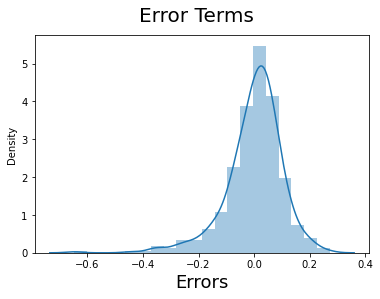

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

We see that the error terms have a mean of 0 as expected. Proceeding to predict the model on the test set.

## 6. Prediction and evaluation on the test set

In [70]:
# First we will have to transform the non-dummy and binary variables in the test set
# We just have to do a transform on the test set, and not a fit
df_test[variables_to_scale] = scaler.transform(df_test[variables_to_scale])

In [71]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weathersit_clear,weathersit_cloudy_misty,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.652968,0.319635,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.477117,0.467403,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       219 non-null    int64  
 1   holiday                  219 non-null    int64  
 2   workingday               219 non-null    int64  
 3   temp                     219 non-null    float64
 4   atemp                    219 non-null    float64
 5   hum                      219 non-null    float64
 6   windspeed                219 non-null    float64
 7   cnt                      219 non-null    float64
 8   season_spring            219 non-null    uint8  
 9   season_summer            219 non-null    uint8  
 10  season_winter            219 non-null    uint8  
 11  mnth_Aug                 219 non-null    uint8  
 12  mnth_Dec                 219 non-null    uint8  
 13  mnth_Feb                 219 non-null    uint8  
 14  mnth_Jan                 

In [73]:
# Create the X and y test sets
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
X_test.shape

(219, 29)

In [75]:
# Adding constant variable to test dataframe
X_test_1 = sm.add_constant(X_test)
X_test_1.shape

(219, 30)

In [76]:
dropped_variables

['atemp',
 'mnth_Oct',
 'weekday_sunday',
 'season_summer',
 'season_spring',
 'mnth_Jun',
 'weekday_wednesday',
 'weekday_thursday',
 'mnth_Aug',
 'weekday_tuesday',
 'weekday_monday',
 'holiday',
 'weathersit_clear',
 'mnth_Mar',
 'hum']

In [77]:
# Creating dataframe by dropping variables from it, the same variables that were dropped in training
X_test_1 = X_test_1.drop(dropped_variables, axis = 1)
X_test_1.shape

(219, 15)

In [78]:
# Making predictions using the model
y_pred = linearRegression_1.predict(X_test_1)

In [79]:
r2_score(y_test,y_pred)

0.7787834143983493

On the training set, R-squared is 79.2 and the test set had an R-sqaured of 77.8. Since (+or-) 5 is a acceptable difference, we will keep this model. 

Text(0, 0.5, 'y_pred')

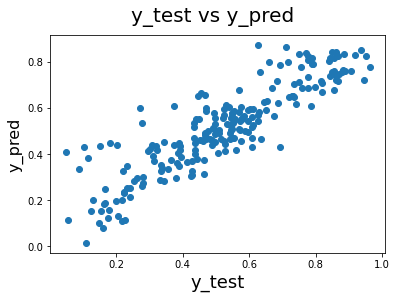

In [80]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [81]:
predictors = linearRegression_1.params
predictors.sort_values(ascending = False)

temp                       0.467397
yr                         0.241293
const                      0.182898
season_winter              0.082360
weekday_saturday           0.057790
mnth_Sep                   0.051171
workingday                 0.046163
mnth_May                   0.044704
mnth_Nov                  -0.039218
mnth_Jul                  -0.057147
mnth_Dec                  -0.057495
weathersit_cloudy_misty   -0.068036
mnth_Feb                  -0.082244
mnth_Jan                  -0.108246
windspeed                 -0.188683
dtype: float64

cnt = 0.182898 + 0.467397 * temp + 0.241293 * yr + 0.08236 * season_winter + 0.057790 * weekday_saturday + 0.051171 *     workingday + 0.04470 * mnth_May - 0.039218 * mnth_Nov - 0.057147 * mnth_Jul - 0.057495 * mnth_Dec - 0.068036 * weathersit_cloudy_misty - 0.082244 * mnth_Feb - 0.108246 * mnth_Jan - 0.188683 * windspeed

<span style="text-decoration:underline">The top 3 features that contribute to bike demand are temperature, year and winter</span>

We see that the manual approach is time consuming and tedious. Let's go for an automated approach

### b. Automated Approach using RFE

In [82]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [83]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 11)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [84]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', False, 7),
 ('mnth_Feb', False, 8),
 ('mnth_Jan', False, 5),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 10),
 ('mnth_Nov', False, 6),
 ('mnth_Oct', False, 16),
 ('mnth_Sep', True, 1),
 ('weathersit_clear', True, 1),
 ('weathersit_cloudy_misty', True, 1),
 ('weekday_monday', False, 13),
 ('weekday_saturday', False, 3),
 ('weekday_sunday', False, 12),
 ('weekday_thursday', False, 18),
 ('weekday_tuesday', False, 14),
 ('weekday_wednesday', False, 17)]

In [85]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_clear',
       'weathersit_cloudy_misty'],
      dtype='object')

In [86]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_summer', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday'],
      dtype='object')

In [87]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,21.21
2,temp,18.55
9,weathersit_clear,12.11
10,weathersit_cloudy_misty,8.00
4,windspeed,4.23
5,season_spring,3.04
6,season_winter,2.23
0,yr,2.08
7,mnth_Jul,1.40
8,mnth_Sep,1.20


In [89]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [90]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [91]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.87e-189
Time:                        21:46:10   Log-Likelihood:                 503.41
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     498   BIC:                            -932.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0940      0.045      2.066      0.039       0.005       0.183
yr                          0.2303      0.008     28.053      0.000       0.214       0.246
holiday                    -0.0981      0.026     -3.794      0.000      -0.149      -0.047
temp                        0.4816      0.031     15.555      0.000       0.421       0.542
hum                        -0.1582      0.038     -4.162      0.000      -0.233      -0.084
windspeed                  -0.1701      0.026     -6.594      0.000      -0.221      -0.119
season_spring              -0.1069      0.015     -7.107      0.000      -0.136      -0.077
season_winter               0.0569      0.012      4.571      0.000       0.032       0.081
mnth_Jul                   -0.0802      0.017     -4.638      0.000      -0.114      -0.046
mnth_Sep                    0.0610      0.016      3.899      0.000       0.030       0.092
weathersit_clear            0.2432      0.027      9.135      0.000       0.191       0.295
weathersit_cloudy_misty     0.1874      0.025      7.418      0.000       0.138       0.237
==============================================================================
Omnibus:                       55.062   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.646
Skew:                          -0.565   Prob(JB):                     9.53e-30
Kurtosis:                       5.239   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A few fields have hight VIF, though p-value is less. Let's try removing one and try

In [92]:
# Removing hum as it has a high VIF value
X_train_rfe = X_train_rfe.drop('hum',1)

In [93]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [94]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.16e-186
Time:                        21:46:10   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0345      0.034     -1.016      0.310      -0.101       0.032
yr                          0.2341      0.008     28.224      0.000       0.218       0.250
holiday                    -0.0986      0.026     -3.752      0.000      -0.150      -0.047
temp                        0.4515      0.031     14.758      0.000       0.391       0.512
windspeed                  -0.1398      0.025     -5.559      0.000      -0.189      -0.090
season_spring              -0.1108      0.015     -7.265      0.000      -0.141      -0.081
season_winter               0.0473      0.012      3.804      0.000       0.023       0.072
mnth_Jul                   -0.0727      0.017     -4.160      0.000      -0.107      -0.038
mnth_Sep                    0.0577      0.016      3.635      0.000       0.027       0.089
weathersit_clear            0.2864      0.025     11.499      0.000       0.237       0.335
weathersit_cloudy_misty     0.2053      0.025      8.112      0.000       0.156       0.255
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# Removing the constant
X_train_rfe_1 = X_train_rfe.drop(['const'], axis=1)

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_1.values, i) for i in range(X_train_rfe_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,12.24
8,weathersit_clear,11.44
9,weathersit_cloudy_misty,6.30
3,windspeed,4.22
4,season_spring,2.57
0,yr,2.07
5,season_winter,1.71
6,mnth_Jul,1.37
7,mnth_Sep,1.20
1,holiday,1.04


In [97]:
# Removing weathersit_clear as it has a high VIF value
X_train_rfe = X_train_rfe.drop('weathersit_clear',1)

In [98]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [99]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [100]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     207.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.85e-162
Time:                        21:46:10   Log-Likelihood:                 434.76
No. Observations:                 510   AIC:                            -849.5
Df Residuals:                     500   BIC:                            -807.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2429      0.027      9.041      0.000       0.190       0.296
yr                          0.2397      0.009     25.766      0.000       0.221       0.258
holiday                    -0.0851      0.029     -2.885      0.004      -0.143      -0.027
temp                        0.4612      0.034     13.424      0.000       0.394       0.529
windspeed                  -0.1687      0.028     -6.000      0.000      -0.224      -0.113
season_spring              -0.1064      0.017     -6.211      0.000      -0.140      -0.073
season_winter               0.0351      0.014      2.520      0.012       0.008       0.062
mnth_Jul                   -0.0767      0.020     -3.906      0.000      -0.115      -0.038
mnth_Sep                    0.0468      0.018      2.630      0.009       0.012       0.082
weathersit_cloudy_misty    -0.0677      0.010     -6.881      0.000      -0.087      -0.048
==============================================================================
Omnibus:                      133.771   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.648
Skew:                          -1.164   Prob(JB):                    1.28e-106
Kurtosis:                       7.187   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Removing the constant
X_train_rfe_1 = X_train_rfe.drop(['const'], axis=1)

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_1.values, i) for i in range(X_train_rfe_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,3.93
0,yr,2.05
4,season_spring,1.65
8,weathersit_cloudy_misty,1.49
5,season_winter,1.37
6,mnth_Jul,1.35
7,mnth_Sep,1.20
1,holiday,1.04


The VIFs are good now, We will go ahead and predict the model on the training set

The R-squared is now 78.9 <br>
Adjusted R-squared is 78.5 <br>
F-statistic is 207.2

In [103]:
y_train_cnt_rfe = lm_1.predict(X_train_rfe)

### Residual Analysis

Text(0.5, 0, 'Errors')

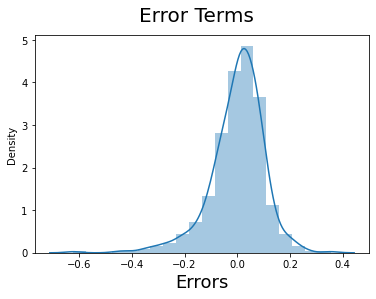

In [104]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The error terms have a mean of 0. We will go ahead and use the model to make predictions on the test set.

## 6. Prediction and evaluation on the test set

In [105]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [106]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test (same once dropped as part of RFE)
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [107]:
# Making predictions on the final model
y_pred = lm_1.predict(X_test_new)

In [108]:
r2_score(y_test,y_pred)

0.7794236473386609

On the training set, R-squared is 78.9 and the test set had an R-sqaured of 77.9. Since (+or-) 5 is a acceptable difference, we will keep this model. 

Text(0, 0.5, 'y_pred')

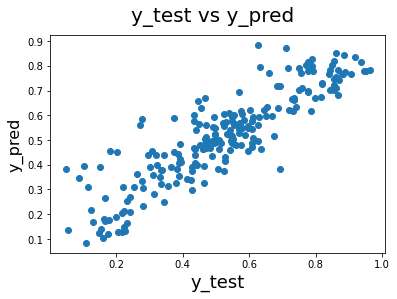

In [116]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [110]:
# getting the predictors from the model
predictors = lm_1.params
predictors.sort_values(ascending = False)

temp                       0.461217
const                      0.242858
yr                         0.239701
mnth_Sep                   0.046824
season_winter              0.035069
weathersit_cloudy_misty   -0.067718
mnth_Jul                  -0.076704
holiday                   -0.085057
season_spring             -0.106401
windspeed                 -0.168721
dtype: float64

cnt = 0.242858 + 0.461217 * temp + 0.239701 * yr + 0.046824 * mnth_Sep + 0.035069 * season_winter - 0.067718 * weathersit_cloudy_misty - 0.076704 * mnth_Jul - 0.085057 * holiday - 0.106401 * season_spring - 0.168721 * windspeed

<span style="text-decoration:underline">The top 3 features that contribute to bike demand are temperature, year and september month</span>

We see that both models predicted almost the same output with little difference in R squared. But the manual approach is time consuming and requires lot of trial and error.

<span style="text-decoration:underline">Observations:</span><br>
1. We saw an increase in bike demand in 2019 compared to 2018. So, when the pandemic ends, and things return to normal, we can see a spike in demand
2. We saw that pleasant temperature contributes to demand
3. We can see that temperature variable is having the highest coefficient of 0.4612, that translates to
       when temperature increases by one unit the bike demand increases by 0.4612 units
4. We also see that spring season, month of july, holidays and windspeed have a negative coefficient, which means that during this time, there will be that many units of less demand. 

<span style="text-decoration:underline">Conclusion:</span><br>
With bike demands increasing each year, the company should see improvements in their business when the situation is back to normal. Any attractive offers during spring season and holidays, might also spike up the business.

In [114]:
## End of case study